In [10]:
!pip install numpy matplotlib scipy sympy


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Перевод уравнения 
$$
\ddot{y}(t) + 5\dot{y}(t)+2y(t) = 5\dot{u}(t) + u(t).
$$
в систему ДУ 1-го порядка с дополнительными обозначениями:
$$
\left\{\begin{matrix}
    \dot{x_1} = x_2, \\
    \dot{x_2} = -2x_1-5x_2+u,\\
    y = x_1 + 5x_2,
\end{matrix}\right.
$$
Подставим $y = x_1 + 5x_2$, $\dot{y} = x_2 + 5\dot{x_2}$, $\ddot{y} = \dot{x_2} + 5\ddot{x_2}$ в исходную систему и проверим, что левая часть соответствует правой.

In [1]:
from sympy import symbols, Function, diff, simplify

# Define symbols
t = symbols('t')
u = Function('u')(t)
x1 = Function('x1')(t)
x2 = Function('x2')(t)

# Given equations
x1_prime = x2
x2_prime = -2*x1 - 5*x2 + u
y_expr = x1 + 5*x2

# Compute derivatives needed
y_prime = diff(y_expr, t).subs({diff(x1, t): x1_prime, diff(x2, t): x2_prime})
y_double_prime = diff(y_prime, t).subs({
    diff(x1, t): x1_prime,
    diff(x2, t): x2_prime,
    diff(u, t): diff(u, t)
})

# LHS expanded
lhs_expanded = simplify(y_double_prime + 5*y_prime + 2*y_expr)

lhs_expanded


u(t) + 5*Derivative(u(t), t)

Получившаяся система должна соответствовать этой:
$$
\left\{\begin{matrix}
    \dot{x_1} = x_2, \\
    \dot{x_2} = - 5 x_2 - 2 x_1 + u,\\
    y = x_1 + 5x_2.
\end{matrix}\right.
$$

Решим систему численным методом:

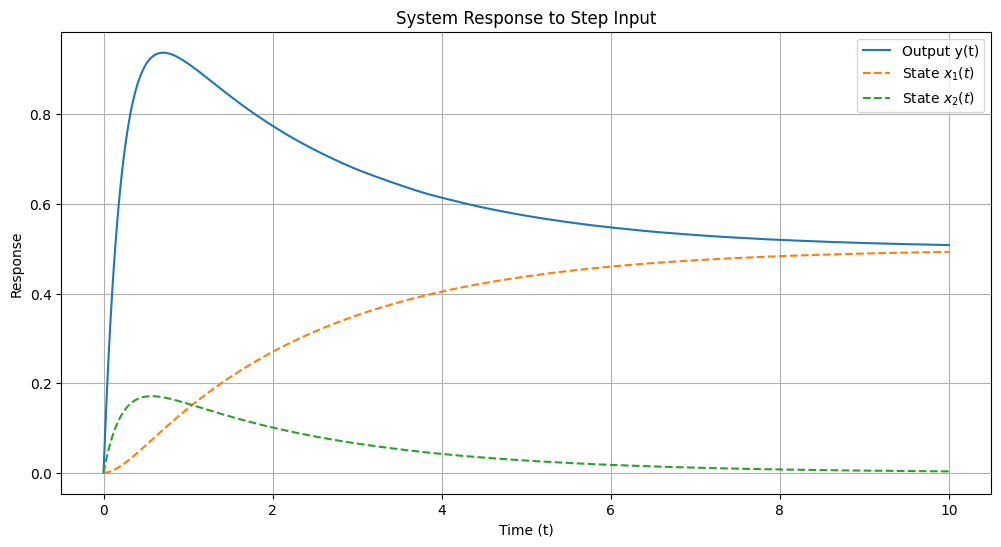

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the system of equations
def system(t, x):
    u = 1 if t >= 0 else 0  # step input
    dx1 = x[1]
    dx2 = -2*x[0] - 5*x[1] + u
    return [dx1, dx2]

# Initial conditions (x(0)=0)
x0 = [0, 0]

# Simulation time
t_span = (0, 10)
t_eval = np.linspace(*t_span, 500)

# Solve the system
sol = solve_ivp(system, t_span, x0, t_eval=t_eval)

# Parameters
t = sol.t
x1 = sol.y[0]
x2 = sol.y[1]
y = x1 + 5*x2

# Plot parameters
plt.figure(figsize=(12, 6))

plt.plot(t, y, label='Output y(t)')
plt.plot(t, x1, '--', label='State $x_1(t)$')
plt.plot(t, x2, '--', label='State $x_2(t)$')

plt.xlabel('Time (t)')
plt.ylabel('Response')
plt.title('System Response to Step Input')
plt.legend()
plt.grid(True)
plt.show()
